In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING LAB/Dataset/sales.csv")

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Order Weekday,Unit Margin,Order_Ship_Days
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,2014-10-18,686800706,2014-10-31,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,2014,10,fri,173.87,13 days
1,North America,Canada,Vegetables,Online,M,2011-11-07,185941302,2011-12-08,3018,154.06,90.93,464953.08,274426.74,190526.34,2011,11,sun,63.13,31 days
2,Middle East and North Africa,Libya,Baby Food,Offline,C,2016-10-31,246222341,2016-12-09,1517,255.28,159.42,387259.76,241840.14,145419.62,2016,10,sun,95.86,39 days
3,Asia,Japan,Cereal,Offline,C,2010-04-10,161442649,2010-05-12,3322,205.70,117.11,683335.40,389039.42,294295.98,2010,4,fri,88.59,32 days
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,2011-08-16,645713555,2011-08-31,9845,9.33,6.92,91853.85,68127.40,23726.45,2011,8,mon,2.41,15 days


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           1000 non-null   object 
 1   Country          1000 non-null   object 
 2   Item Type        1000 non-null   object 
 3   Sales Channel    1000 non-null   object 
 4   Order Priority   1000 non-null   object 
 5   Order Date       1000 non-null   object 
 6   Order ID         1000 non-null   int64  
 7   Ship Date        1000 non-null   object 
 8   Units Sold       1000 non-null   int64  
 9   Unit Price       1000 non-null   float64
 10  Unit Cost        1000 non-null   float64
 11  Total Revenue    1000 non-null   float64
 12  Total Cost       1000 non-null   float64
 13  Total Profit     1000 non-null   float64
 14  Order year       1000 non-null   int64  
 15  Order Month      1000 non-null   int64  
 16  Order Weekday    1000 non-null   object 
 17  Unit Margin    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING LAB/Dataset/sales.csv")

In [ ]:
data['Order_Ship_Days'] = data['Order_Ship_Days'].str.extract('(\d+)').astype(float)

categorical_cols = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Weekday']
data = pd.get_dummies(data, columns=categorical_cols)

numerical_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Order year', 'Order Month', 'Unit Margin', 'Order_Ship_Days']
data[numerical_cols] = StandardScaler().fit_transform(data[numerical_cols])

In [ ]:
X = data.drop(['Order ID', 'Order Date', 'Ship Date'], axis=1)
y = data['Total Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Unit Margin,Order_Ship_Days,...,Order Priority_H,Order Priority_L,Order Priority_M,Order Weekday_fri,Order Weekday_mon,Order Weekday_sat,Order Weekday_sun,Order Weekday_thur,Order Weekday_tue,Order Weekday_wed
29,1.198311,-0.835414,-0.732271,-0.424188,-0.389660,-0.462816,1.278687,-1.540699,-1.009629,-1.301814,...,False,False,False,False,False,False,False,True,False,False
535,0.516569,0.740035,1.025817,0.967108,1.250725,-0.042843,1.740975,-1.252610,-0.386580,0.822087,...,False,False,False,False,False,False,False,False,False,True
695,1.517630,-0.994182,-0.874279,-0.591398,-0.546945,-0.634081,-1.032750,1.340189,-1.191852,-1.301814,...,False,False,False,False,True,False,False,False,False,False
557,-0.798293,-0.031618,-0.145804,-0.422750,-0.429839,-0.335487,0.816400,0.764011,0.362862,-1.644379,...,False,False,True,False,True,False,False,False,False,False
836,-1.548312,-0.500418,-0.536725,-0.834874,-0.761483,-0.927367,0.354112,0.475923,-0.271624,0.753574,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.181061,-0.507273,-0.499568,-0.726067,-0.669016,-0.785972,-1.032750,-0.964521,-0.426514,-0.548172,...,True,False,False,False,False,True,False,False,False,False
270,-1.150371,-0.707817,-0.851163,-0.766995,-0.752628,-0.691182,-1.495038,1.340189,-0.071760,0.479522,...,False,False,False,False,False,False,False,False,False,True
860,0.842440,1.802129,1.940592,2.392562,2.581354,1.448158,-0.108175,1.052100,0.951987,-1.301814,...,False,False,True,False,True,False,False,False,False,False
435,0.805887,1.802129,1.940592,2.346102,2.533466,1.413257,-0.108175,1.628278,0.951987,0.616548,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 - 2s - 43ms/step - loss: 0.1572 - val_loss: 0.0176
Epoch 2/500
50/50 - 0s - 8ms/step - loss: 0.0295 - val_loss: 0.0088
Epoch 3/500
50/50 - 1s - 13ms/step - loss: 0.0222 - val_loss: 0.0092
Epoch 4/500
50/50 - 1s - 13ms/step - loss: 0.0232 - val_loss: 0.0275
Epoch 5/500
50/50 - 1s - 13ms/step - loss: 0.0298 - val_loss: 0.0065
Epoch 6/500
50/50 - 1s - 12ms/step - loss: 0.0192 - val_loss: 0.0090
Epoch 7/500
50/50 - 1s - 11ms/step - loss: 0.0219 - val_loss: 0.0083
Epoch 8/500
50/50 - 1s - 12ms/step - loss: 0.0189 - val_loss: 0.0060
Epoch 9/500
50/50 - 1s - 13ms/step - loss: 0.0151 - val_loss: 0.0104
Epoch 10/500
50/50 - 0s - 8ms/step - loss: 0.0161 - val_loss: 0.0103
Epoch 11/500
50/50 - 1s - 11ms/step - loss: 0.0154 - val_loss: 0.0069
Epoch 12/500
50/50 - 0s - 7ms/step - loss: 0.0114 - val_loss: 0.0053
Epoch 13/500
50/50 - 1s - 12ms/step - loss: 0.0170 - val_loss: 0.0085
Epoch 14/500
50/50 - 0s - 8ms/step - loss: 0.0108 - val_loss: 0.0212
Epoch 15/500
50/50 - 1s - 11ms/step - loss: 0

In [ ]:
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')s

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 
Training Loss: 0.0026565182488411665
Test Loss: 0.020975293591618538


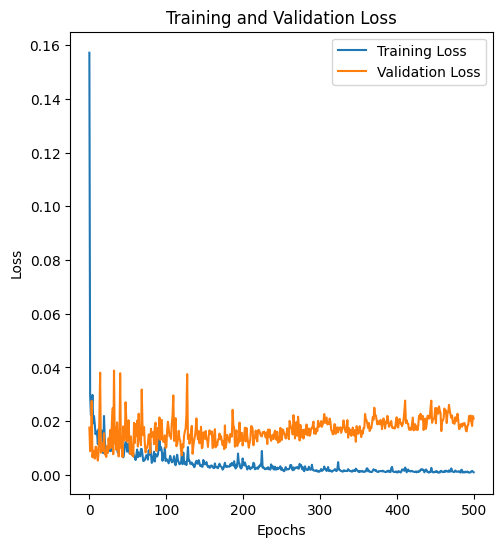

In [ ]:
import matplotlib.pyplot as plt

# After training the model, plot the loss curves
def plot_loss_curves(history):
    plt.figure(figsize=(12, 6))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()0

    plt.show()

# Call the function to plot the loss curves
plot_loss_curves(history)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 - 2s - 45ms/step - loss: 4.0973 - val_loss: 2.7742
Epoch 2/500
50/50 - 0s - 9ms/step - loss: 2.3165 - val_loss: 1.7668
Epoch 3/500
50/50 - 0s - 6ms/step - loss: 1.5634 - val_loss: 1.2321
Epoch 4/500
50/50 - 0s - 7ms/step - loss: 1.1236 - val_loss: 0.9052
Epoch 5/500
50/50 - 0s - 6ms/step - loss: 0.8465 - val_loss: 0.7014
Epoch 6/500
50/50 - 0s - 5ms/step - loss: 0.6531 - val_loss: 0.5363
Epoch 7/500
50/50 - 0s - 4ms/step - loss: 0.5097 - val_loss: 0.4171
Epoch 8/500
50/50 - 0s - 4ms/step - loss: 0.4178 - val_loss: 0.3350
Epoch 9/500
50/50 - 0s - 4ms/step - loss: 0.3354 - val_loss: 0.2848
Epoch 10/500
50/50 - 0s - 6ms/step - loss: 0.2867 - val_loss: 0.2335
Epoch 11/500
50/50 - 0s - 6ms/step - loss: 0.2455 - val_loss: 0.1968
Epoch 12/500
50/50 - 0s - 7ms/step - loss: 0.2093 - val_loss: 0.1661
Epoch 13/500
50/50 - 1s - 12ms/step - loss: 0.1906 - val_loss: 0.1479
Epoch 14/500
50/50 - 0s - 6ms/step - loss: 0.1654 - val_loss: 0.1330
Epoch 15/500
50/50 - 1s - 13ms/step - loss: 0.1553 - 

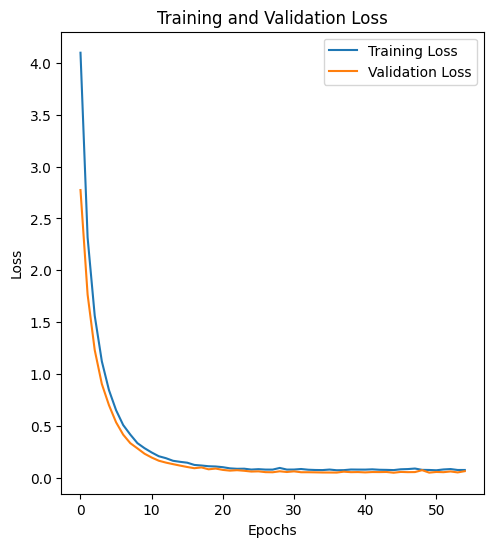

In [ ]:
# Build the deep neural network with regularization and dropout
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

# Plot the loss curves
def plot_loss_curves(history):
    plt.figure(figsize=(12, 6))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the function to plot the loss curves
plot_loss_curves(history)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Linear Regression:")
print(f"  Training MSE: {train_mse}")
print(f"  Test MSE: {test_mse}")

Linear Regression:
  Training MSE: 4.557823376990758e-30
  Test MSE: 3.819115408415932e-30


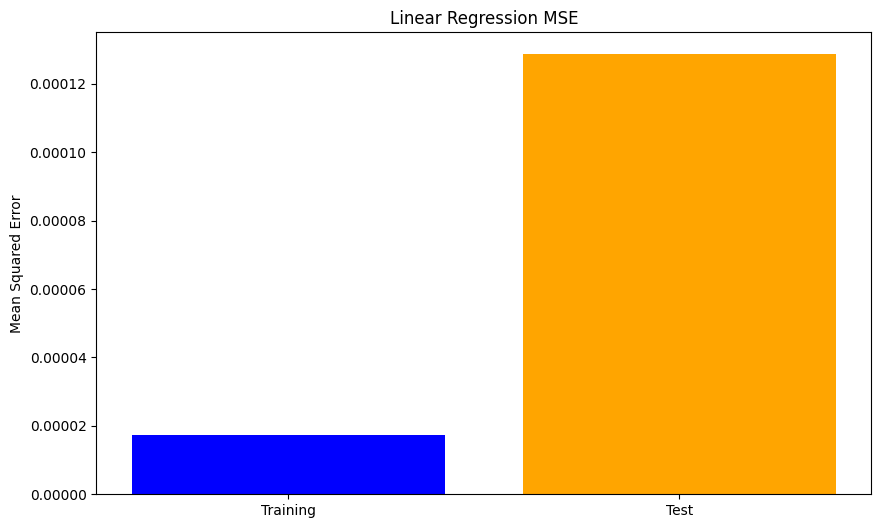

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Training', 'Test'], [train_mse, test_mse], color=['blue', 'orange'])
plt.title('Linear Regression MSE')
plt.ylabel('Mean Squared Error')
plt.show()

# Decision Tree Regressor

In [ ]:
model = DecisionTreeRegressor(max_depth=20)  # High depth to induce overfitting
model.fit(X_train, y_train)

# Predict and evaluate
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Decision Tree Regressor:")
print(f"  Training MSE: {train_mse}")
print(f"  Test MSE: {test_mse}")

Decision Tree Regressor:
  Training MSE: 0.0
  Test MSE: 0.00016443161048871696


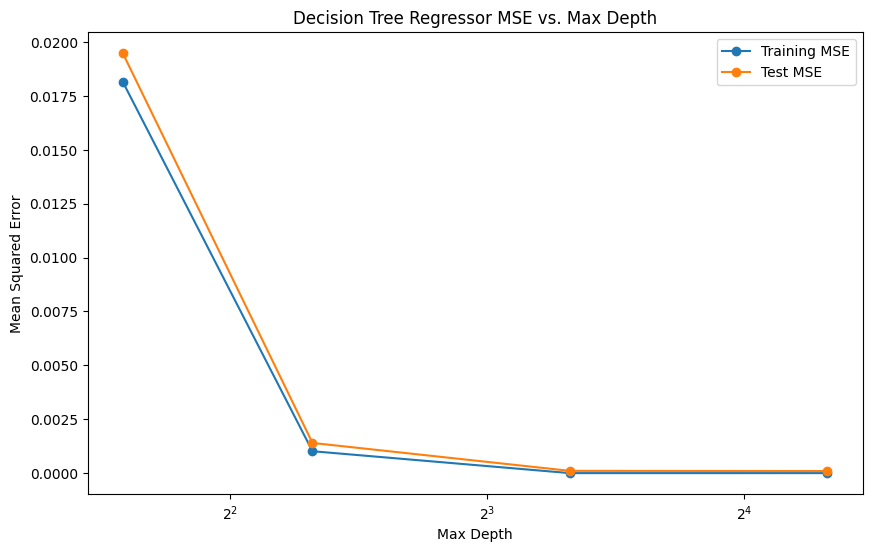

In [ ]:
depths = [3, 5, 10, 20, None]
train_mse = []
test_mse = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mse.append(mean_squared_error(y_train, train_preds))
    test_mse.append(mean_squared_error(y_test, test_preds))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depths, train_mse, marker='o', linestyle='-', label='Training MSE')
plt.plot(depths, test_mse, marker='o', linestyle='-', label='Test MSE')
plt.xscale('log', base=2)
plt.title('Decision Tree Regressor MSE vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=20)  # High depth to induce overfitting
model.fit(X_train, y_train)

# Predict and evaluate
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Random Forest Regressor:")
print(f"  Training MSE: {train_mse}")
print(f"  Test MSE: {test_mse}")

Random Forest Regressor:
  Training MSE: 1.737765436778464e-05
  Test MSE: 0.00012866004606606313


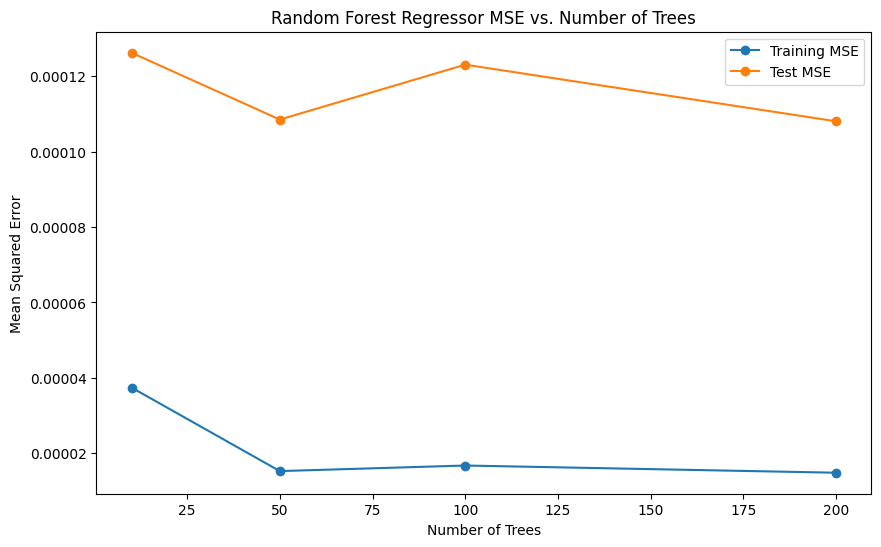

In [ ]:
n_estimators = [10, 50, 100, 200]
train_mse = []
test_mse = []

for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, max_depth=20)  # High depth to induce overfitting
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mse.append(mean_squared_error(y_train, train_preds))
    test_mse.append(mean_squared_error(y_test, test_preds))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_mse, marker='o', linestyle='-', label='Training MSE')
plt.plot(n_estimators, test_mse, marker='o', linestyle='-', label='Test MSE')
plt.title('Random Forest Regressor MSE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Ridge and Lasso

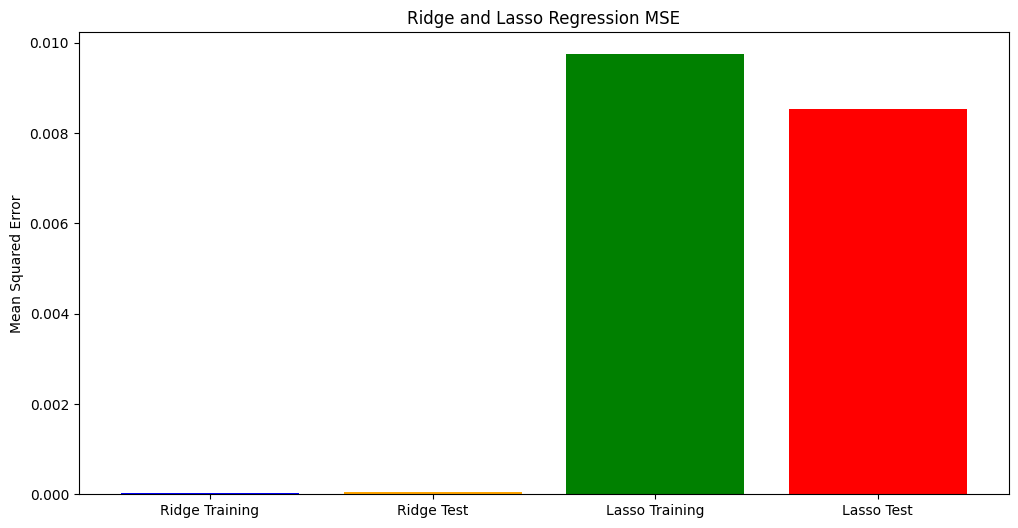

In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
train_preds = ridge_model.predict(X_train)
test_preds = ridge_model.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
train_preds_lasso = lasso_model.predict(X_train)
test_preds_lasso = lasso_model.predict(X_test)
train_mse_lasso = mean_squared_error(y_train, train_preds_lasso)
test_mse_lasso = mean_squared_error(y_test, test_preds_lasso)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(['Ridge Training', 'Ridge Test', 'Lasso Training', 'Lasso Test'],
        [train_mse, test_mse, train_mse_lasso, test_mse_lasso], color=['blue', 'orange', 'green', 'red'])
plt.title('Ridge and Lasso Regression MSE')
plt.ylabel('Mean Squared Error')
plt.show()

# Tuning Decision Trees

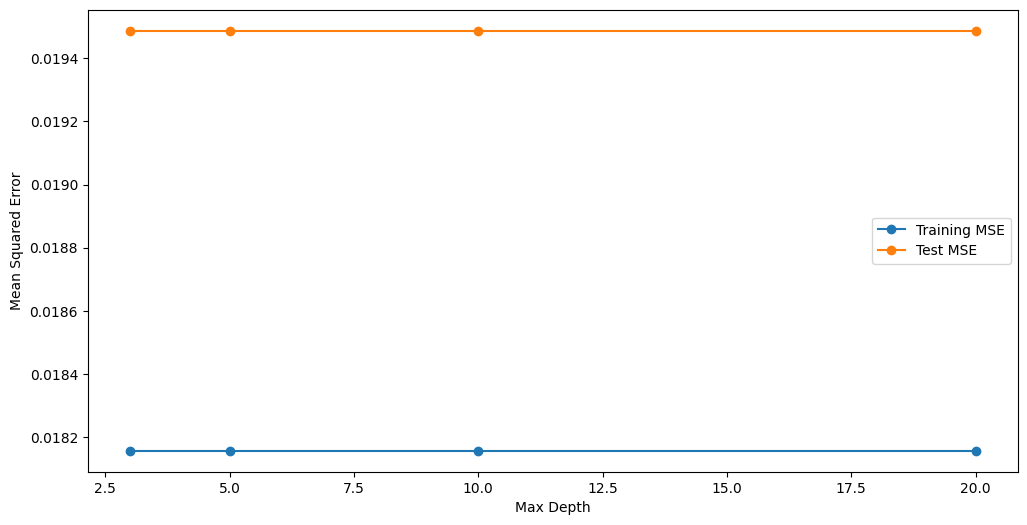

In [ ]:
depths = [3, 5, 10, 20, None]
min_samples_leaf = [1, 5, 10, 20]
train_mse = []
test_mse = []

for depth in depths:
    for min_samples in min_samples_leaf:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=min_samples)
        model.fit(X_train, y_train)

        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)

        train_mse.append(mean_squared_error(y_train, train_preds))
        test_mse.append(mean_squared_error(y_test, test_preds))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(depths, train_mse[:len(depths)], marker='o', linestyle='-', label='Training MSE')
plt.plot(depths, test_mse[:len(depths)], marker='o', linestyle='-', label='Test MSE')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Tuning Random Forest

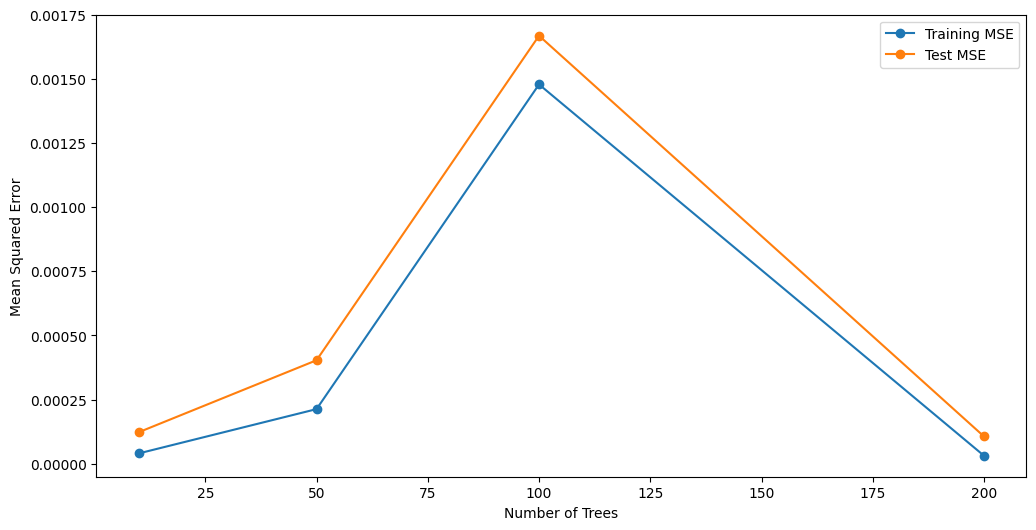

In [ ]:
n_estimators = [10, 50, 100, 200]
max_depth = [10, 20, None]
min_samples_leaf = [1, 5, 10]

train_mse = []
test_mse = []

for n in n_estimators:
    for depth in max_depth:
        for min_samples in min_samples_leaf:
            model = RandomForestRegressor(n_estimators=n, max_depth=depth, min_samples_leaf=min_samples)
            model.fit(X_train, y_train)

            train_preds = model.predict(X_train)
            test_preds = model.predict(X_test)

            train_mse.append(mean_squared_error(y_train, train_preds))
            test_mse.append(mean_squared_error(y_test, test_preds))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(n_estimators, train_mse[:len(n_estimators)], marker='o', linestyle='-', label='Training MSE')
plt.plot(n_estimators, test_mse[:len(n_estimators)], marker='o', linestyle='-', label='Test MSE')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()